In [61]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([4,6,8,10]).T
y = np.array([2.3,4.1,5.7,6.9]).T

X = np.c_[np.ones((X.shape[0])),X]     # prepend a column of ones as the first column

theta = np.array([-0.7,0.2]).T        # start with this theta

costHistory = []

In [62]:
theta0_path = [theta[0]]
theta1_path = [theta[1]]
print(theta0_path,theta1_path)

[-0.7] [0.2]


Now we perform batch gradient descent

In [63]:
alpha = 0.03
epochs = 1500
for epoch in np.arange(0,epochs):
    preds = X.dot(theta)                # prediction using current theta
    error = preds - y                   # error
    cost = np.sum(np.asarray(error)**2) # compute cost function 
    costHistory.append(cost)            # and append it to cost history
#    print("[INFO] echo #{}, cost={:.7f}".format(epoch+1,cost))
    grad = X.T.dot(error)/X.shape[0]
    theta = theta - alpha*grad
    theta0_path.append(theta[0])
    theta1_path.append(theta[1])

print(theta)

[-0.63977236  0.76997044]


As we notice, this is approximately the same result as with the normal equations.

We will now draw the cost function versus the number of iterations

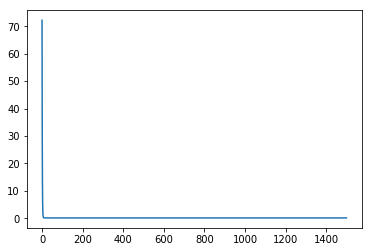

In [64]:
fig = plt.figure()
plt.plot(np.arange(0,epochs),costHistory)

In order to better understand what's happening at the beginning, we redraw the curve using only 50 iterations

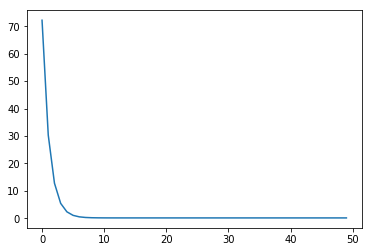

In [65]:
fig = plt.figure()
plt.plot(np.arange(0,50),costHistory[0:50])

Finally lets compute the absolute errors at the data points:

In [66]:
print(X.dot(theta)-y)

[ 0.14010941 -0.11994971 -0.18000883  0.15993205]


In [67]:
def parallel_cost(X,Y,x_data,y_data):
    m = X.shape[0]
    n = X.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(x_data)):
        tot += (X + Y*x_data[i] - y_data[i]) ** 2;
    return tot/(2*len(x_data))

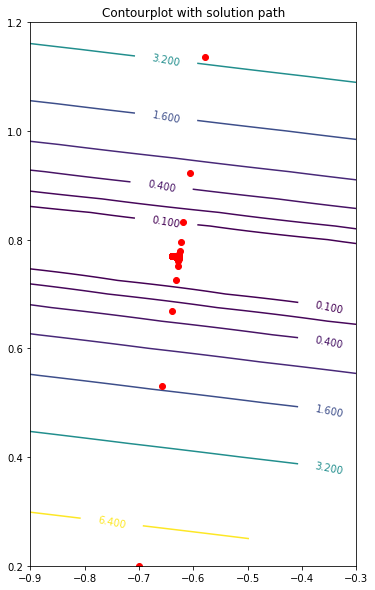

In [77]:
import matplotlib

delta = 0.025
x1 = np.arange(-1.0,0.0,delta)
y1 = np.arange(0.25,1.25,delta)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = parallel_cost(X1,Y1,X[:,1],y)

# Create a simple contour plot
plt.figure(figsize=(6,10))
CS = plt.contour(X1,Y1,Z1,levels = [0.1,0.2,0.4,0.8,1.6,3.2,6.4])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta0_path, theta1_path, 'ro', linewidth=3)
plt.title('Contourplot with solution path')
plt.axis('scaled')
plt.axis([-0.9,-0.3,0.2,1.2])
#plt.show()
plt.savefig('figs/Contourplot_BGD_01.pdf', bbox_inches='tight')